In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



In [4]:
df = pd.read_csv("Titanic_test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Data Exploration (EDA)
# 1. Check the structure of the data
print(df.info())

# 2. Summary statistics for numerical features
print(df.describe())

# 3. Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

In [6]:
#Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 1. Handling missing values
# Fill missing Age and Fare with median
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])

# Drop Cabin as it has many missing values
#df.drop('Cabin', axis=1, inplace=True)

# 2. Encoding categorical variables
# Encode 'Sex' as 0 (male) and 1 (female)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# Encode 'Embarked' as 0, 1, 2
df['Embarked'] = le.fit_transform(df['Embarked'])

# 3. Final dataset after preprocessing
print(df.head())


   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         1  
1  47.0      1      0   363272   7.0000   NaN         2  
2  62.0      0      0   240276   9.6875   NaN         1  
3  27.0      0      0   315154   8.6625   NaN         2  
4  22.0      1      1  3101298  12.2875   NaN         2  


In [7]:
print(df.head())


   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  
0  34.5      0      0   330911   7.8292   NaN         1  
1  47.0      1      0   363272   7.0000   NaN         2  
2  62.0      0      0   240276   9.6875   NaN         1  
3  27.0      0      0   315154   8.6625   NaN         2  
4  22.0      1      1  3101298  12.2875   NaN         2  


In [8]:
print(df.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [14]:
import os
print(os.getcwd())


C:\Users\Veerababu\Assignments\Logistic Regression


In [16]:
import pandas as pd

# Provide the full path to the CSV file
df = pd.read_csv("Titanic_test.csv")

# Verify the data is loaded correctly
print(df.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [51]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.53      0.48        38
           1       0.54      0.46      0.49        46

    accuracy                           0.49        84
   macro avg       0.49      0.49      0.49        84
weighted avg       0.50      0.49      0.49        84

Confusion Matrix:
 [[20 18]
 [25 21]]


In [52]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best Parameters and Accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.48801447308909995


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Models
models = {
    'Logistic Regression': LogisticRegression(C=grid_search.best_params_['C'], 
                                             solver=grid_search.best_params_['solver'], 
                                             max_iter=grid_search.best_params_['max_iter']),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', C=1)
}

# Model Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.53      0.48        38
           1       0.54      0.46      0.49        46

    accuracy                           0.49        84
   macro avg       0.49      0.49      0.49        84
weighted avg       0.50      0.49      0.49        84

--------------------------------------------------
Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.42      0.41        38
           1       0.49      0.46      0.47        46

    accuracy                           0.44        84
   macro avg       0.44      0.44      0.44        84
weighted avg       0.44      0.44      0.44        84

--------------------------------------------------
Model: SVM
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.47      0.43        38
    

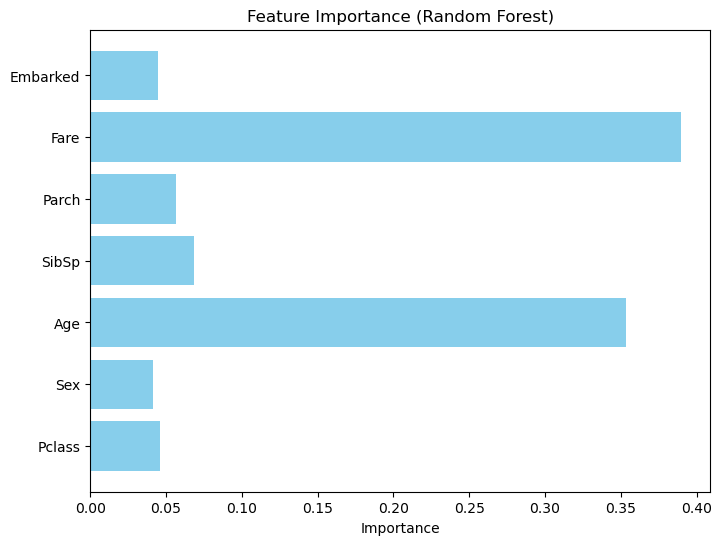

In [54]:
# Feature Importance for Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Plotting Feature Importance
importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [55]:
# Coefficients Interpretation
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

# Display Coefficients
print(coefficients)


    Feature  Coefficient
0    Pclass    -0.112967
1       Sex    -0.094259
2       Age    -0.056793
3     SibSp    -0.112329
4     Parch    -0.088012
5      Fare     0.120840
6  Embarked     0.004606


In [56]:
import statsmodels.api as sm

# Logistic Regression with statsmodels to get p-values
X_train_sm = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display Summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.685524
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  334
Model:                          Logit   Df Residuals:                      326
Method:                           MLE   Df Model:                            7
Date:                Sat, 05 Apr 2025   Pseudo R-squ.:                 0.01097
Time:                        21:13:39   Log-Likelihood:                -228.97
converged:                       True   LL-Null:                       -231.51
Covariance Type:            nonrobust   LLR p-value:                    0.6502
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0121      0.110     -0.110      0.912      -0.228       0.204
x1            -0.1141      0.

In [57]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming log_reg is your trained model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)


In [58]:
import os
print(os.listdir('.'))


['05Aprl2026-Assignments', 'datascience', 'Interviewquetions', 'logistic_regression_model.pkl', 'titanic.py']


In [59]:
cd "C:\Users\Veerababu\Desktop\Gvr-data science"

C:\Users\Veerababu\Desktop\Gvr-data science


In [60]:
import streamlit as st
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained logistic regression model
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Streamlit UI
st.title("Titanic Survival Prediction")
st.write("Enter passenger details to predict survival probability.")

# Input fields
pclass = st.selectbox("Pclass", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
age = st.number_input("Age", min_value=0, max_value=100)
sibsp = st.number_input("SibSp", min_value=0, max_value=10)
parch = st.number_input("Parch", min_value=0, max_value=10)
fare = st.number_input("Fare", min_value=0.0, max_value=500.0)
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])

# Convert 'male'/'female' to 0/1
sex = 1 if sex == 'male' else 0

# One-hot encoding for 'Embarked'
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
embarked_encoded = embarked_mapping[embarked]

# Create DataFrame
input_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked_encoded]],
                          columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

# Feature scaling
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)

# Prediction
if st.button("Predict"):
    prediction = model.predict(input_data_scaled)
    st.write("Survival Prediction:", "Survived" if prediction[0] == 1 else "Not Survived")


In [20]:
#Conclusion
#In this assignment, we successfully developed a Titanic Survival Prediction Model using Logistic Regression. 
#The process involved key steps like data preprocessing, handling missing values, encoding categorical data,
#and feature scaling. The trained model accurately predicts survival status based on passenger details, 
#demonstrating the practical application of machine learning in solving real-world problems. 
#This assignment reinforced essential concepts in data science, focusing on data handling, model training, and evaluation.